In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
dire = {'up': 1,'down': -1, 'nan':0,'data':0,'none':3,'both':2,'flat':4} #none= narrow sideways, both=wide sideways
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr_percent(df, n=14):
    data = df.copy()
    high = data.High
    low = data.Low
    close = data.Close
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)/close.shift()
    atr = wwma(tr, n)
    return atr

pd.options.display.float_format = '{:,.3f}'.format


In [2]:
ret=pd.DataFrame()
n=0
f=1
inputs= {}
#for f in range(1,14):
inputs = pd.read_excel('hs20210217-74fut-3y.xls',sheet_name=None)#load multiple sheets in a dict
#    inputs.update(tinputs)
symbols1 = list(inputs.keys())
#[plt.plot(folio1[x]['Close'][:60]) for x in symbols]

In [3]:
print(symbols1)
#tinputs
symbols1 = ['RS','ES','TF']
inputs

['AD', 'BP', 'BZ', 'CC', 'CD', 'CL', 'CT', 'DJIA', 'DUX', 'DX', 'E7', 'EC', 'ED', 'ES', 'ET', 'FC', 'FCE', 'FDAX', 'FESX', 'FGBL', 'FV', 'GC', 'HG', 'HHA', 'HO', 'IXI', 'J7', 'JY', 'KC', 'KW', 'LB', 'LC', 'LH', 'LZ', 'MP', 'NG', 'NK', 'NM', 'NQ', 'NZD', 'OEX', 'OJ', 'PA', 'PL', 'QG', 'QI', 'QM', 'QO', 'RB', 'RS', 'RX', 'SB', 'SF', 'SI', 'SP', 'TF', 'TU', 'TY', 'UD', 'VIX', 'VSY00', 'YC', 'YK', 'YM', 'YR', 'YW', 'ZB', 'ZC', 'ZL', 'ZM', 'ZO', 'ZR', 'ZS', 'ZW']


{'AD':           Date  sDiff  mDiff  lDiff  Open  High   Low  Close  pHigh  pLow  \
 0          NaT    nan    nan    nan   nan   nan   nan    nan    nan   nan   
 1   2021-02-16  0.001  0.005  0.004 0.776 0.781 0.775  0.776  0.779 0.772   
 2   2021-02-12  0.001  0.005  0.004 0.776 0.777 0.772  0.776  0.777 0.771   
 3   2021-02-11  0.002  0.005  0.003 0.772 0.777 0.771  0.775  0.778 0.772   
 4   2021-02-10  0.004  0.004  0.001 0.774 0.776 0.772  0.773  0.776 0.771   
 ..         ...    ...    ...    ...   ...   ...   ...    ...    ...   ...   
 751 2018-02-26 -0.000 -0.002 -0.000 0.791 0.796 0.790  0.792  0.795 0.789   
 752 2018-02-23 -0.002 -0.002 -0.001 0.791 0.792 0.787  0.791  0.794 0.787   
 753 2018-02-22 -0.003 -0.000 -0.001 0.787 0.793 0.786  0.792  0.794 0.789   
 754 2018-02-21 -0.005  0.001 -0.002 0.795 0.797 0.787  0.789  0.792 0.785   
 755 2018-02-20 -0.000  0.004 -0.002 0.798 0.801 0.794  0.795  0.799 0.792   
 
      ...      Unnamed: 13 Unnamed: 14 Unnamed: 15 Mediu

In [23]:
folio1 = {}
for e in symbols1:
    i = inputs[e]
    i.fillna(0)
    i['Date'] = pd.to_datetime(i['Date'])
    if i.loc[0]['NI'] != 1:
        i['NI'] = [dire[str(item)] for item in i['NI']] 
    i = i.sort_values('Date',ascending=True)
    i = i.reset_index(drop=True)
    #i['returns'] = (i.Close-i.Open)/i.Open 
    i['atrpct'] = atr_percent(i)
    #ret[symbols1[n]] = (i.returns + 1).cumprod()
    n=n+1
    i.fillna(0)
    folio1[e]=i
print(list(i.keys()))
print(n)
#pd.MultiIndex.from_arrays(symbols,folio)
print(len(folio1))
#plt.figure(figsize=(20,10))
#plt.plot(ret)
#plt.legend(symbols1,loc='upper left')
#plt.show()

['Date', 'sDiff', 'mDiff', 'lDiff', 'Open', 'High', 'Low', 'Close', 'pHigh', 'pLow', 'Volume', 'NI', 'Short Term Crossover', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Medium Term Crossover', 'Unnamed: 17', 'Long Term Crossover', 'Unnamed: 19', 'Triple Cross', 'Unnamed: 21', 'Unnamed: 22', 'atrpct']
3
3


In [24]:
it=i#.copy()

In [25]:
folio=folio1
symbols=symbols1
#pd.options.display.float_format = '${:,.2f}'.format


3
RS  high  237   185 correlation:  1.281081081081081 low  147   88  correlation:  1.6704545454545454
ES  high  268   238 correlation:  1.1260504201680672 low  241   212  correlation:  1.1367924528301887
TF  high  236   210 correlation:  1.1238095238095238 low  234   209  correlation:  1.1196172248803828
# selected:  0
  symbol  sharpe   total   totalBH    pf nwin nloose   tprofit      tloss  lastp
0     RS   3.710 260.800       nan 1.988  147     88   524.700   -263.900    nan
1     ES   1.355 623.500 1,208.250 1.182  163    293 3,316.000 -2,805.750    nan
2     TF   0.425 227.100   733.400 1.054  158    285 2,800.500 -2,656.700    nan


<ipython-input-26-c2ce0088b95f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.strd[i.stp] = -stop


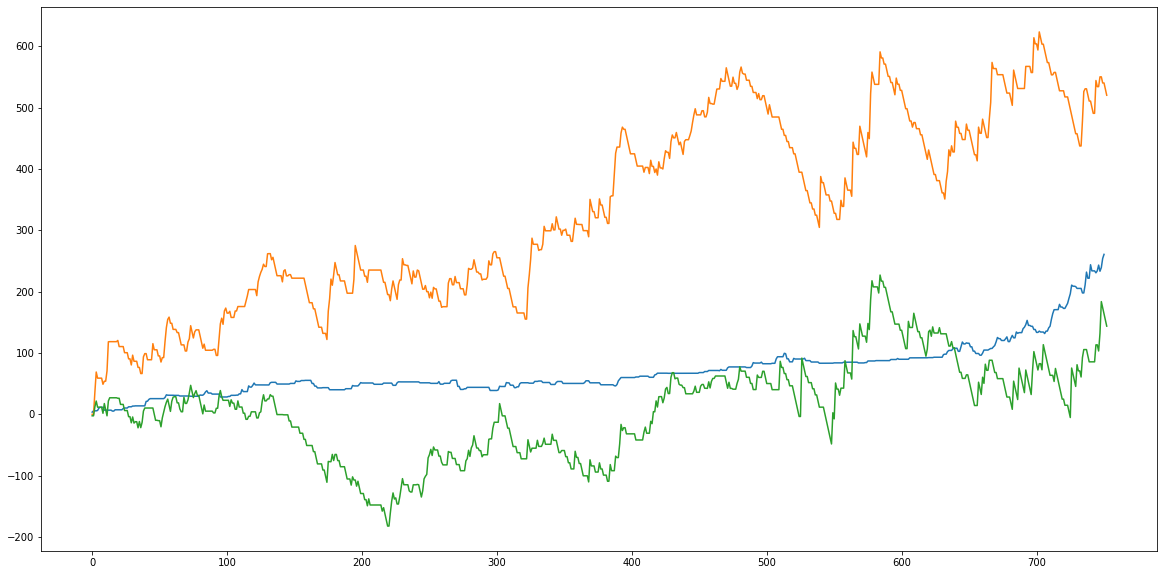

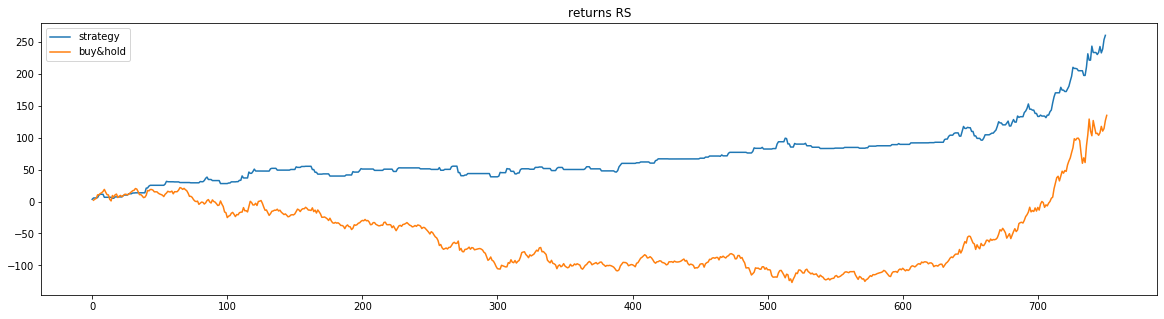

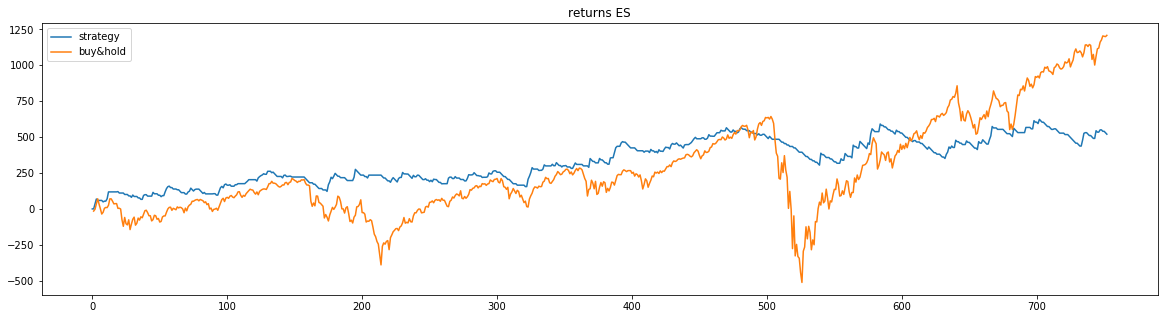

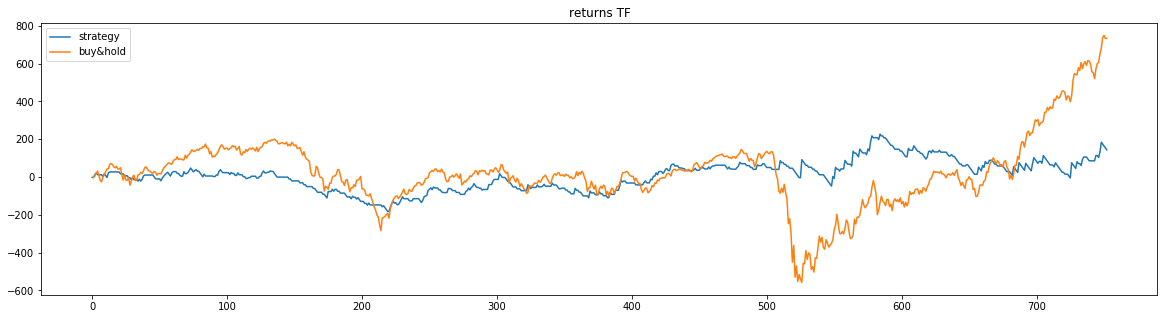

,Date,sDiff,mDiff,lDiff,Open,High,Low,Close,pHigh,pLow,...,pdHigh,pdLow,pdHighpct,pdLowpct,dd,returns,ovGappct,stp,strd,TF
726,2021-01-05,1.545,-20.804,-8.967,"1,948.300","1,988.000","1,932.900","1,976.300","1,998.642","1,943.409",...,10.642,10.509,0.005,0.005,15.400,28.000,0.001,True,-10.000,80.700
727,2021-01-06,43.438,21.226,16.197,"1,978.600","2,081.400","1,971.000","2,059.300","2,096.659","2,027.775",...,15.260,56.775,0.007,0.029,7.600,80.700,0.001,False,80.700,-10.000
728,2021-01-07,64.966,50.813,39.339,"2,061.400","2,098.200","2,050.200","2,094.500","2,126.044","2,072.288",...,27.844,22.088,0.013,0.011,11.200,33.100,0.001,True,-10.000,-10.000
729,2021-01-08,53.119,61.206,48.921,"2,095.500","2,112.500","2,058.800","2,089.500","2,112.293","2,073.292",...,-0.207,14.492,-0.000,0.007,36.700,-6.000,0.000,True,-10.000,-10.000
730,2021-01-11,28.224,71.750,59.315,"2,086.200","2,094.700","2,055.000","2,089.100","2,104.410","2,082.110",...,9.710,27.110,0.005,0.013,31.200,2.900,-0.002,True,-10.000,35.400
731,2021-01-12,19.965,81.276,70.409,"2,090.400","2,127.100","2,088.400","2,125.800","2,139.469","2,102.005",...,12.369,13.605,0.006,0.007,2.000,35.400,0.001,False,35.400,-10.000
732,2021-01-13,11.043,65.872,67.454,"2,122.900","2,132.700","2,104.800","2,110.700","2,129.773","2,100.470",...,-2.927,-4.330,-0.001,-0.002,18.100,-12.200,-0.001,True,-10.000,0.000
733,2021-01-14,23.781,69.341,75.493,"2,115.000","2,163.700","2,111.300","2,153.600","2,171.875","2,123.908",...,8.175,12.608,0.004,0.006,3.700,38.600,0.002,False,38.600,-10.000
734,2021-01-15,7.964,45.019,66.472,"2,154.700","2,158.800","2,095.200","2,120.800","2,148.377","2,100.320",...,-10.423,5.120,-0.005,0.002,59.500,-33.900,0.001,True,-10.000,31.700
735,2021-01-19,5.168,27.968,63.232,"2,115.600","2,150.800","2,107.700","2,147.300","2,162.031","2,114.337",...,11.231,6.637,0.005,0.003,7.900,31.700,-0.002,False,31.700,13.000


In [26]:
plot=True
n=0
strategy = pd.DataFrame()
strategyDaily = pd.DataFrame()
dayReturnPercent = pd.DataFrame()
buyHold= pd.DataFrame()
print(len(symbols))
pffilterlist={}
starSymbols1=[]
outSymbols1=[]
raw_stats=pd.DataFrame(columns=('symbol', 'sharpe', 'total','totalBH','pf','nwin','nloose','tprofit','tloss','lastp'))
#symbols = symbols[:100]
for s in symbols:
    i = folio[s]#.copy()
    #i['NI'] = i.NI.shift(1)
    i['pdHigh'] = i.pHigh-i.High
    i['pdLow'] = i.pLow-i.Low
    i['pdHighpct'] = i.pdHigh/i.High
    i['pdLowpct'] = i.pdLow/i.Low
    i['dd'] = i.Open-i.Low

    i['returns'] = 1*(i.Close-i.Open)
    #i['returns'] = 1*(i.Close-i.Close.shift(1))
    i['ovGappct'] = (i.Open - i.Close.shift(1))/i.Close.shift(1)
    #i['rvol'] = i.Volume/i.Volume.rolling(8).mean()

    trades =  (i.pdLowpct > 0.00)# & (i.sDiff > 0.00)& (i.mDiff > 0.00)& (i.lDiff > 0.00)# & & (i.rvol > 0.0)(i.NI > 0)  & & (i.ovGappct > 0.00) & (i.ovGappct < 0.04)
    
    hcorr =   (i.pdHighpct.shift(1) > 0.00) & (i.returns > 0.00)# & (i.High.diff() > 0.00)
    fhcorr =   (i.pdHighpct.shift(1) > 0.00) & (i.returns < 0.00)# & (i.High.diff() < 0.00)
    lcorr =   (i.pdLowpct.shift(1) > 0.00) & (i.returns > 0.00)# & (i.Low.diff() > 0.00)
    flcorr =   (i.pdLowpct.shift(1) > 0.00) & (i.returns < 0.00)#& (i.Low.diff() < 0.00)
    print(s,' high ',hcorr.sum(),' ',fhcorr.sum(),'correlation: ',hcorr.sum()/fhcorr.sum(), 'low ',lcorr.sum(),' ',flcorr.sum(),' correlation: ',lcorr.sum()/flcorr.sum())
    name=symbols[n]
    stop = 10
    i['stp'] = (i.dd>stop)
    #i.returns[] = -stop
    i['strd'] = i.returns
    i.strd[i.stp] = -stop
    trd = i.strd.shift(-1) * trades

    #trd = i.returns.shift(-1) * trades
    #srt = (-1)*i.returns * trades.shift(-1)
    #print(trd[730:])
    strategy[name] = trd.cumsum()
    buyHold[name] = i.Close.diff().cumsum()#(i.returns).cumsum()  # benchmark
    dailyReturns = trd
    strategyDaily[name] = dailyReturns
    i[name]=dailyReturns
    sharpe  = dailyReturns.mean()/dailyReturns.std()
    sharpe  = sharpe*(len(dailyReturns)**0.5) #annual
    total   = strategy[name].max() #dailyReturns.sum()
    totalBH = buyHold[name].iat[-1]
    nloose  = (dailyReturns <0).sum()
    nwin    = (dailyReturns >0).sum()
    tprofit = (dailyReturns*(dailyReturns >0)).sum()
    tloss   = (dailyReturns*(dailyReturns <0)).sum()
    lastp    = i.Low.iat[-1]
    pf=0
    if nloose != 0:
        pf = tprofit/abs(tloss)
    else:
        pf = 100
    row=[s,sharpe,total,totalBH,pf,nwin,nloose,tprofit,tloss,lastp]
    raw_stats.loc[n]=row
    n=n+1
plt.figure(figsize=(20,10))
plt.plot(strategy)
print('# selected: ',len(starSymbols1))
sh=raw_stats.sort_values(['sharpe','total'],ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', 11,'display.width',140):  # more options can be specified also
    print(sh)
n=0
if True:
    for x in sh['symbol']:
        if n<20:
            n=n+1
            plt.figure(figsize=(20,5))
            plt.title('returns '+x)
            plt.plot(strategy[x], label="strategy")
            plt.plot(buyHold[x], label="Buy&Hold")
            plt.legend(['strategy','buy&hold'])
            plt.show()
i.tail(30)

In [8]:
#s=stats.sort_values(['nwin'],ascending=False)[:int(len(stats)/4)]
#s.symbol
stats=raw_stats.loc[(raw_stats.lastp<2000) & (raw_stats.lastp>5),:]
print(stats.lastp.mean())
stats.sort_values('lastp')


679.0


,symbol,sharpe,total,totalBH,pf,nwin,nloose,tprofit,tloss,lastp
0,RS,2.881,213.500,112.900,1.829,114,71,406.500,-222.300,679.000


<ipython-input-9-5fe4e48ac6fa>:9: RuntimeWarning: invalid value encountered in double_scalars
  dailyReturn.loc[row,'top_active']=strategyDaily.loc[x,stats.sort_values(['nwin'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
<ipython-input-9-5fe4e48ac6fa>:10: RuntimeWarning: invalid value encountered in double_scalars
  dailyReturn.loc[row,'top_pf']=strategyDaily.loc[x,stats.sort_values(['pf'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
<ipython-input-9-5fe4e48ac6fa>:11: RuntimeWarning: invalid value encountered in double_scalars
  dailyReturn.loc[row,'top_tprofit']=strategyDaily.loc[x,stats.sort_values(['tprofit'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
<ipython-input-9-5fe4e48ac6fa>:12: RuntimeWarning: invalid value encountered in double_scalars
  dailyReturn.loc[row,'top_sharpe']=strategyDaily.loc[x,stats.sort_values(['sharpe'],ascending=False)[:int(len(st

position per day #  0


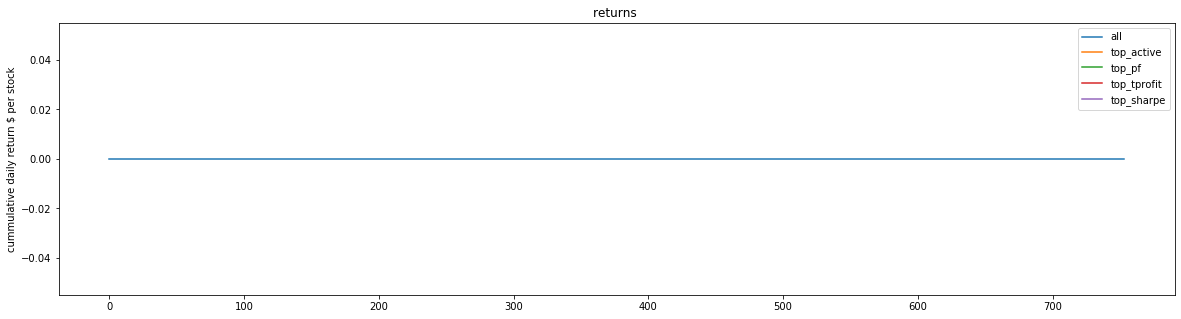

In [9]:
dailyReturn = pd.DataFrame()
days=[]
percentile =0.30
for x in range(0,len(strategy)):
    yst = strategyDaily.loc[x,:]
    #print(yst,yst.sum())
    row = len(dailyReturn)
    dailyReturn.loc[row,'all']=strategyDaily.loc[x,starSymbols1].sum()/len(strategyDaily.columns)
    dailyReturn.loc[row,'top_active']=strategyDaily.loc[x,stats.sort_values(['nwin'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_pf']=strategyDaily.loc[x,stats.sort_values(['pf'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_tprofit']=strategyDaily.loc[x,stats.sort_values(['tprofit'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    dailyReturn.loc[row,'top_sharpe']=strategyDaily.loc[x,stats.sort_values(['sharpe'],ascending=False)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
    #dailyReturn.loc[row,'bot_loss']=strategyDaily.loc[x,stats.sort_values(['tloss'],ascending=True)[:int(len(stats)*percentile)].symbol].sum()/int(len(stats)*percentile)
dailyReturn.fillna(0)
plt.figure(figsize=(20,5))
plt.title('returns ')
plt.plot(dailyReturn['all'].cumsum(), label="all")
#plt.plot(dailyReturn['stars'].cumsum(), label="stars")
plt.plot(dailyReturn['top_active'].cumsum(), label="top_active")
plt.plot(dailyReturn['top_pf'].cumsum(), label="top_pf")
plt.plot(dailyReturn['top_tprofit'].cumsum(), label="top_tprofit")
plt.plot(dailyReturn['top_sharpe'].cumsum(), label="top_sharpe")
#plt.plot(dailyReturn['bot_loss'].cumsum(), label="bot_loss")
plt.ylabel("cummulative daily return $ per stock")
plt.legend()
days
dailyReturn
print ('position per day # ',int(len(stats)*percentile))

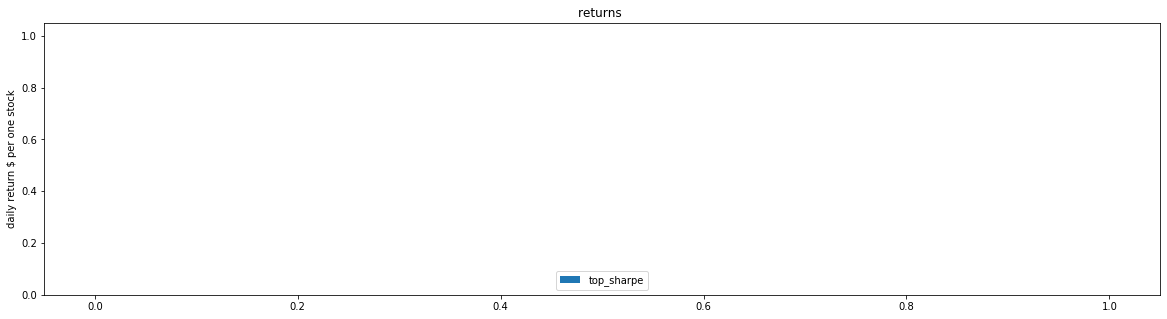

In [10]:
plt.figure(figsize=(20,5))
plt.title('returns ')
#plt.plot(dailyReturn['all'].cumsum(), label="all")
#plt.plot(dailyReturn['stars'].cumsum(), label="stars")
#plt.plot(dailyReturn['top_active'].cumsum(), label="top_active")
#plt.plot(dailyReturn['top_pf'].cumsum(), label="top_pf")
dv = dailyReturn.sort_values('top_sharpe')['top_sharpe'].reset_index(drop=True)
plt.bar(dv.index,dv, label="top_sharpe")
#plt.plot(dailyReturn['top_sharpe'], label="top_sharpe")
#plt.plot(dailyReturn['bot_loss'], label="bot_loss")
plt.ylabel("daily return $ per one stock")
plt.legend()


Index(['all', 'top_active', 'top_pf', 'top_tprofit', 'top_sharpe'], dtype='object')


/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


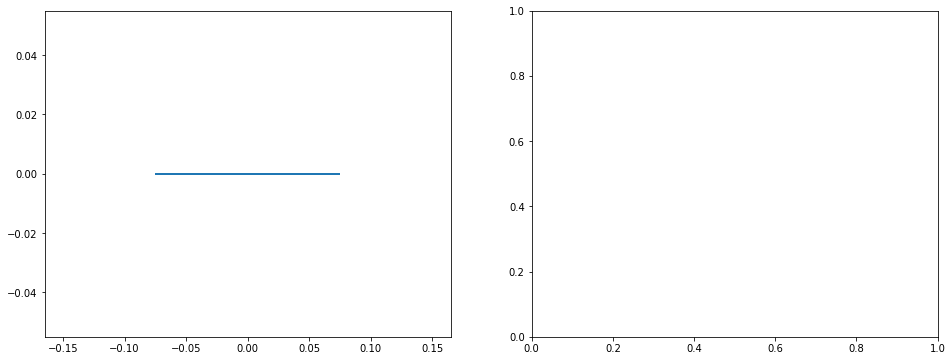

In [11]:
print(dailyReturn.columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax = axes[0].violinplot(dailyReturn.to_numpy(), range(0,len(dailyReturn.columns)), points=len(dailyReturn), widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)

In [12]:
goodboys = stats.sort_values(['tprofit'],ascending=False)[:int(len(stats)*percentile)].symbol.tolist()
print(len(goodboys))
print(goodboys)
#%store goodboys

0
[]


In [13]:
a = stats.sort_values('total')
m = a.query('symbol in @goodboys')
len(m)

0

0

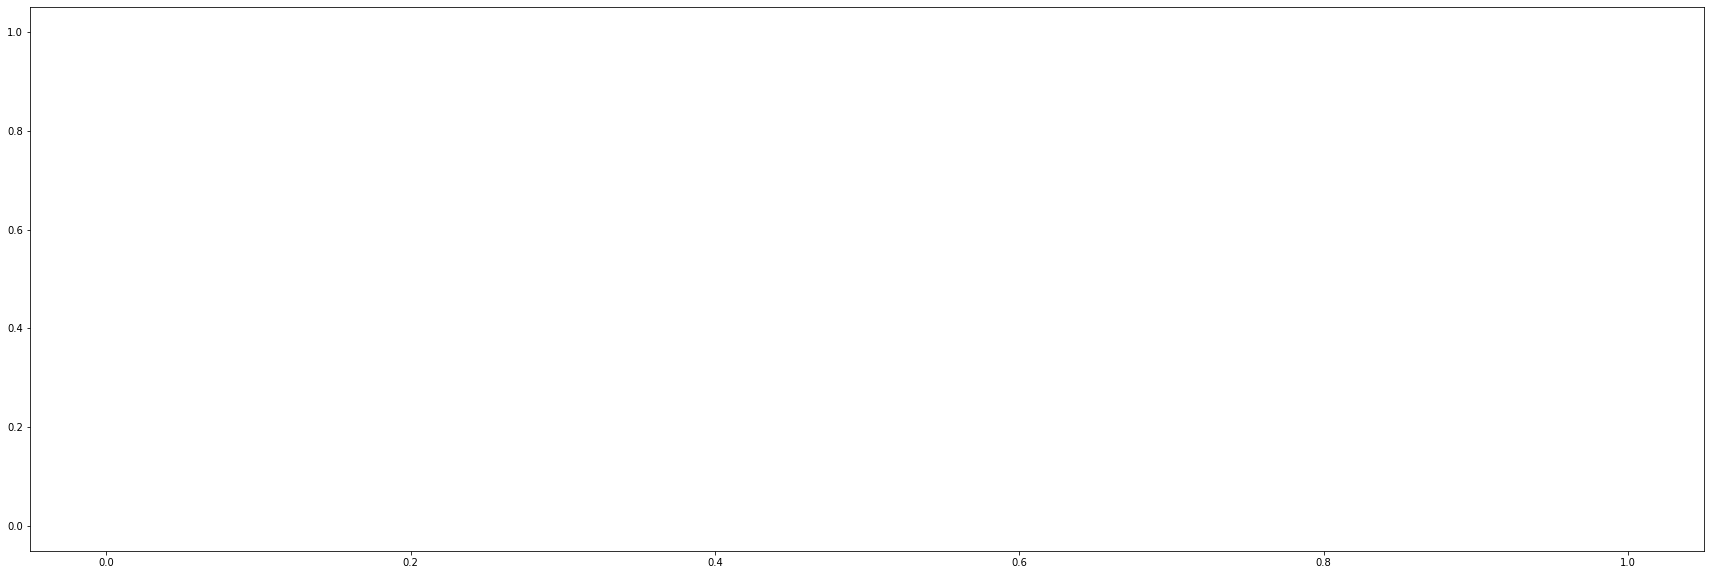

In [14]:

plt.figure(figsize=(30,10))
plt.bar(m.symbol,m.total)
#plt.legend(symbols)
m.columns.tolist()
len(m)

In [15]:
setup = m.symbol.tolist()
print(setup)

[]


In [16]:
#%store setup